In [2]:
import cv2
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [3]:
movie_id = "eWkhCLhQ2Kk"
video = cv2.VideoCapture(f'../video/{movie_id}.mp4')

In [4]:
video.get(cv2.CAP_PROP_FRAME_COUNT)

89040.0

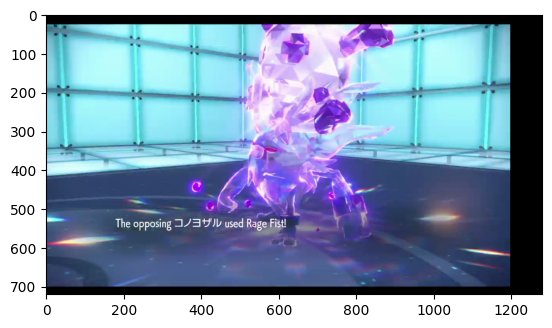

In [42]:
### %matplotlib inline
video.set(cv2.CAP_PROP_POS_FRAMES, 82152) # 94050
ret, frame = video.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)) # [500:600, 150:800]
plt.show()

# cv2.imwrite("../template_images/general_templates/select_done.png", frame[560:610, 90:503])

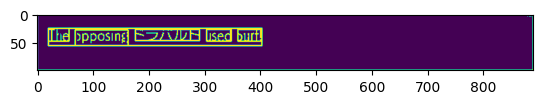

In [14]:
import pytesseract
from pytesseract import Output

message = frame[500:600, 160:1050]
message = cv2.cvtColor(message, cv2.COLOR_BGR2GRAY)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)

d = pytesseract.image_to_data(message, output_type=Output.DICT, lang="eng")
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(message, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(message)
plt.show()

In [43]:
message = frame[500:600, 160:1050]
message = cv2.cvtColor(message, cv2.COLOR_BGR2GRAY)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
pytesseract.image_to_string(message, lang="eng")

'The opposing 1/3 FIL used Rage Fist!\n'

I/ S/W)

1/3 FIL

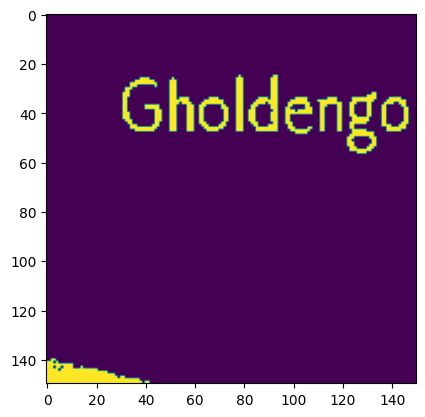

In [1425]:
# 黒いメッセージウィンドウ部分を際立たせる処理
gray = cv2.cvtColor(frame[500:650, 150:300], cv2.COLOR_BGR2GRAY)

threshold_value = 200
max_value = 255
ret, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

In [1424]:
gray = cv2.cvtColor(frame[500:650, 150:300], cv2.COLOR_BGR2GRAY)
threshold_value = 200
max_value = 255
ret, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)
max_white_pixels = 5000
min_white_pixels = 500
white_pixels = cv2.countNonZero(thresh)
if white_pixels > min_white_pixels and white_pixels < max_white_pixels:
    print('メッセージが存在します')
else:
    print('メッセージは存在しません')

メッセージが存在します


In [267]:
white_pixels

524

In [1428]:
def detect_message_window(frame):
    gray = cv2.cvtColor(frame[520:550, 180:200], cv2.COLOR_BGR2GRAY)
    threshold_value = 230
    max_value = 255
    ret, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)
    max_white_pixels = 200
    min_white_pixels = 60
    white_pixels = cv2.countNonZero(thresh)
    print(white_pixels)
    is_message = white_pixels > min_white_pixels and white_pixels < max_white_pixels
    
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(thresh)
    is_exist_text = len(regions) >= 2
    
    return is_message & is_exist_text

In [150]:
TEMPLATE_MATCHING_THRESHOLD = 0.8

first_template = cv2.imread("../template_images/general_templates/first.png", 0)
second_template = cv2.imread("../template_images/general_templates/second.png", 0)
third_template = cv2.imread("../template_images/general_templates/third.png", 0)
select1_window = cv2.cvtColor(frame[118:150, 480:580], cv2.COLOR_RGB2GRAY)
select2_window = cv2.cvtColor(frame[192:223, 480:580], cv2.COLOR_RGB2GRAY)
select3_window = cv2.cvtColor(frame[263:295, 480:580], cv2.COLOR_RGB2GRAY)
select4_window = cv2.cvtColor(frame[335:367, 480:580], cv2.COLOR_RGB2GRAY)
select5_window = cv2.cvtColor(frame[408:440, 480:580], cv2.COLOR_RGB2GRAY)
select6_window = cv2.cvtColor(frame[480:512, 480:580], cv2.COLOR_RGB2GRAY)

pokemon_select_order_score = []
for i, template in enumerate([first_template, second_template, third_template]):
    for k, window in enumerate([select1_window, select2_window, select3_window, select4_window, select5_window, select6_window]):
        res = cv2.matchTemplate(window, template, cv2.TM_CCOEFF_NORMED)
        score = cv2.minMaxLoc(res)[1]
        if score >= TEMPLATE_MATCHING_THRESHOLD:
            pokemon_select_order_score.append([k, i, score])

pokemon_select_order = []
for i in range(3):
    pokemon_select_order.append(
        max(
            [score for score in pokemon_select_order_score if score[1] == i],
            key=lambda x: x[2],
        )[0]
    )
pokemon_select_order

[0, 4, 5]

In [33]:
res[0].description

'102341'

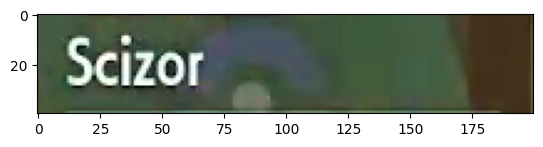

True

In [178]:
# pokemon_name
video.set(cv2.CAP_PROP_POS_FRAMES, 75300-1)
ret, frame = video.read()
plt.imshow(frame[575:615, 50:250])
plt.show()

cv2.imwrite("../template_images/labeled_pokemon_name_window_templates/ハッサム_英語.png", frame[575:615, 50:250])

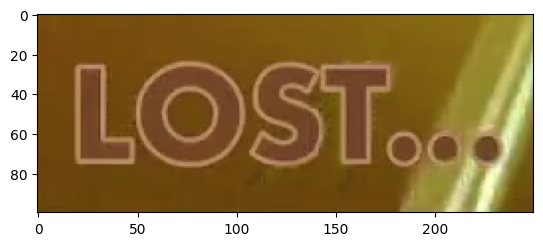

In [66]:
# win, lose を切り取る
video.set(cv2.CAP_PROP_POS_FRAMES, 16730-1)
ret, frame = video.read()
plt.imshow(frame[600:700, 250:500])
plt.show()

# cv2.imwrite("../template_images/general_templates/win.png", frame[600:700, 250:500])

In [1346]:
movie_id = "eWkhCLhQ2Kk"
video = cv2.VideoCapture(f'../video/{movie_id}.mp4')

standing_by_template = cv2.imread('../template_images/general_templates/standing_by.png')
gray_standing_by_template = cv2.cvtColor(standing_by_template, cv2.COLOR_RGB2GRAY)

level_50_template = cv2.imread('../template_images/general_templates/level_50.png')
gray_level_50_template = cv2.cvtColor(level_50_template, cv2.COLOR_RGB2GRAY)

standing_by_frames = []
level_50_frames = []
message_frames = []
for i in tqdm(range(int(video.get(cv2.CAP_PROP_FRAME_COUNT)))):
    ret, frame = video.read()
    if ret:
        # standing_by
        gray_standing_by_area = cv2.cvtColor(frame[575:610, 160:435], cv2.COLOR_RGB2GRAY)
        result = cv2.matchTemplate(gray_standing_by_area, gray_standing_by_template, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        if cv2.minMaxLoc(result)[1] >= threshold:
            standing_by_frames.append(i)
        
        # level_50
        gray_level_50_area = cv2.cvtColor(frame[55:80, 980:1040], cv2.COLOR_RGB2GRAY)
        level_50_result = cv2.matchTemplate(gray_level_50_area, gray_level_50_template, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        if cv2.minMaxLoc(level_50_result)[1] >= threshold:
            level_50_frames.append(i)
        
        # message
        is_message = detect_message_window(frame)
        if is_message:
            # その後、戦闘画面でないものは追加しない処理をする
            # Lv50 は技を避けたときには表示されているため使えない
            message_frames.append(i)
    else:
        continue

  0%|          | 0/89040 [00:00<?, ?it/s]

In [1347]:
len(standing_by_frames)

1745

In [1348]:
len(level_50_frames)

18040

In [1349]:
len(message_frames)

14982

In [1350]:
# フレームを連続区間で分割する
standing_by_frame_results = []
temp = []
for i in range(len(standing_by_frames)):
    temp.append(standing_by_frames[i])
    if i < len(standing_by_frames)-1 and standing_by_frames[i+1] - standing_by_frames[i] > 100:
        standing_by_frame_results.append(temp)
        temp = []
standing_by_frame_results.append(temp)

level_50_frame_results = []
temp = []
for i in range(len(level_50_frames)):
    temp.append(level_50_frames[i])
    if i < len(level_50_frames)-1 and level_50_frames[i+1] - level_50_frames[i] > 100:
        level_50_frame_results.append(temp)
        temp = []
level_50_frame_results.append(temp)

# 前のフレームと全く同じ部分だけを取り出したい
message_frame_results = []
temp2 = []
for i in range(len(message_frames)):
    temp2.append(message_frames[i])
    if i < len(message_frames)-1 and message_frames[i+1] - message_frames[i] > 3:
        if len(temp2) > 1:
            message_frame_results.append(temp2)
        temp2 = []
message_frame_results.append(temp2)

In [1351]:
len(standing_by_frame_results)

4

In [1352]:
len(level_50_frame_results)

60

In [1353]:
len(message_frame_results)

434

In [1408]:
message_frame_results[372][-1]

76719

In [1411]:
message_frame_results[373][0]

76930

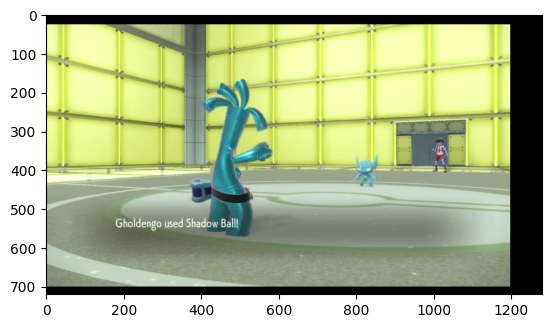

In [1422]:
## メッセージウィンドウの確認

video.set(cv2.CAP_PROP_POS_FRAMES, 76750-1)
# video.set(cv2.CAP_PROP_POS_FRAMES, 27900-1)
ret, frame = video.read()
plt.imshow(frame)
plt.show()

In [1423]:
detect_message_window(frame)

False

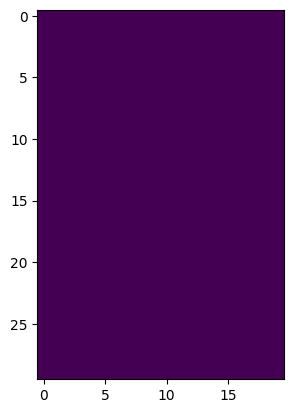

In [1412]:
video.set(cv2.CAP_PROP_POS_FRAMES, 76930-1)
ret, frame = video.read()
gray = cv2.cvtColor(frame[520:550, 180:200], cv2.COLOR_BGR2GRAY)  # 520:550, 180:200  # 500:600, 160:1050
threshold_value = 200
max_value = 255
ret, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)
white_pixels = cv2.countNonZero(thresh)
plt.imshow(thresh)
plt.show()

In [1403]:
white_pixels

118

In [1177]:
"テツノドクガ fainted!".replace(" ", "_").replace(".", ">")

'テツノドクガ_fainted!'

In [1178]:
cv2.imwrite("../template_images/message_templates/テツノドクガ_fainted!.png", thresh)

True

In [1404]:
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(thresh)
len(regions)

4

In [86]:
# ポケモンの位置を切り取る
def get_opponent_pokemons(video, target_frame):
    video.set(cv2.CAP_PROP_POS_FRAMES, target_frame-1)
    res, frame = video.read()

    opponent_pokemon_1 = frame[170:230, 770:840]
    opponent_pokemon_2 = frame[230:295, 770:840]
    opponent_pokemon_3 = frame[295:360, 770:840]
    opponent_pokemon_4 = frame[360:425, 770:840]
    opponent_pokemon_5 = frame[425:485, 770:840]
    opponent_pokemon_6 = frame[485:550, 770:840]
    opponent_pokemons = [
        opponent_pokemon_1,
        opponent_pokemon_2,
        opponent_pokemon_3,
        opponent_pokemon_4,
        opponent_pokemon_5,
        opponent_pokemon_6
    ]
    return opponent_pokemons

# ポケモンの名前を切り取る
def get_opponent_pokemon_name(video, target_frame):
    video.set(cv2.CAP_PROP_POS_FRAMES, target_frame-1)
    res, frame = video.read()

    pokemon_name_window = frame[80:120, 950:1150]
    return pokemon_name_window

In [128]:
opponent_pokemons_list = []
for i, frames in enumerate(standing_by_frame_results):
    target_frame = frames[-10]
    opponent_pokemons = get_opponent_pokemons(video, target_frame)
    opponent_pokemons_list.append(opponent_pokemons)
    for k, op in enumerate(opponent_pokemons):
        # 検出したポケモンたちを保存する
        cv2.imwrite(f"pokemon_templates/{movie_id}_{i}_{k}.png", op)

In [129]:
for i, frames in enumerate(level_50_frame_results):
    target_frame = frames[-10]
    opponent_pokemon_name_window = get_opponent_pokemon_name(video, target_frame)
    cv2.imwrite(f"pokemon_name_window_templates/{movie_id}_{i}.png", opponent_pokemon_name_window)